<table>
    <tr>
      <td>
      <img src='https://www.ideal-ist.eu/sites/default/files/2018-10/logo_quantum_flagship.jpg' width=450>
      </td>
      <td>
      <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Logo_UniJena.svg/1200px-Logo_UniJena.svg.png' width=450>
      </td>
      <td>
      <img src='https://www.akc.ac.cy/images/2022/03/Funded-by-the-European-Union.png' width=450>
      </td>
     </tr>
</table>

<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Quantum Computing, Summer 2022</h1>
<h2 style="text-align: center;"><a href="https://qt.eu/">European Union Quantum Flagship /</a> <a href="https://qtom.qtedu.eu/">QTEdu Quantum Technology Open Master</a></h2>
<h2 style="text-align: center;"><a href="https://www.uni-jena.de/en">Friedrich Schiller University Jena</a></h2>
<h3><em>Quantum Fourier Transformation</em></h3>
<h3>Anastasiia Andriievska</h3>

</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
# Importing Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit import ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools import job_monitor
from qiskit.circuit.library import QFT

import matplotlib.pylab as plt
sim = Aer.get_backend('aer_simulator') 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<h3>Quantum Fourier Transformation</h3>
<h4>a) Fourier Transformation is Equivalent to Far-Field-Scattering.</h4>
<h4>Verify the relation between the distance of two slits and the fringe separation in the far field.</h4>
<h5>The interference pattern consists of equally spaced fringes of equal intensity.</h5>
<h5>This result is valid only if L >> d and for small values of $\theta$.</h5>
<h5>The phase difference between the two waves at P depends on their path difference.</h5>
<h5>Fringe separation$\;\Delta x = \dfrac {\lambda \; D}{d}\;$ where 𝑑 is the slit separation, 𝜆 is the wavelength of light and 𝐷 the distance from the slits to the screen.</h5>
<h5>$\boldsymbol{d \;\textbf{sin} \;\theta = m \lambda, \;\textbf{for} \; m = 0, \; 1, \; -1, \; 2, \; -2,\; \dots \;\;\;(\textbf{constructive})}$.</h5>
<h5>$\boldsymbol{d \;\textbf{sin} \;\theta = m \theta , \;\textbf{for} \; m = 0, \;1, \; -1, \; 2, \; -2, \; \dots}.
$.</h5>
<h5>For fixed $\boldsymbol{\lambda}$ and $\boldsymbol{m}$, the smaller $\boldsymbol{d}\;$ is, the larger $\boldsymbol{\theta}$ must be, since
$\boldsymbol{\textbf{sin} \;\theta = m \lambda / d}$.</h5>
<h5>Wave effects are most noticeable when the object the wave encounters (here, slits a distance d apart) is small.</h5>
<h5>Small d gives large θ, hence a large effect.</h5>


<h4>b) Fourier Transformation can be used for signal interpolation and smoothing.</h4>
<h4>Create a function in 4-Qubit basis, then QFT, then implement a 5 QuBit inverse QFT, which uses a firth qubit that is in $|0\rangle$.</h4>
<h4>Show that the resulting wave-function is interpolated from the initial 4-Qubit function.</h4>

Firstly, use Qiskit to conduct a QFT operation.

Put qubits in the state $|\widetilde{5}\rangle$:

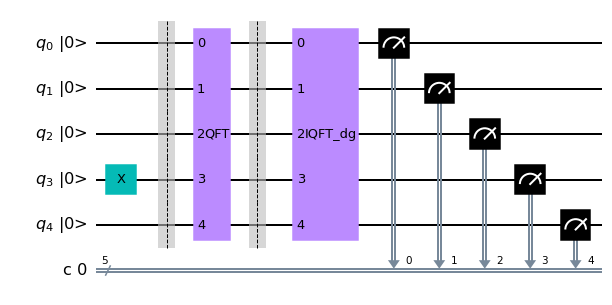

In [2]:
n_qubit = 5
c_qubit = n_qubit
QR = QuantumRegister(n_qubit,name="q")
CR = ClassicalRegister(c_qubit,name="c")
qc = QuantumCircuit(QR,CR)

qc.x(3)
# QFT
qc.barrier() 
qc.compose(QFT(n_qubit),range(0,n_qubit), inplace=True)
qc.barrier() 

qc.compose(QFT(n_qubit, inverse=True),range(0,n_qubit), inplace=True)

qc.measure(QR,CR)

qc.draw(initial_state=True)

This does indeed result in the Fourier state $|\widetilde{5}\rangle$:

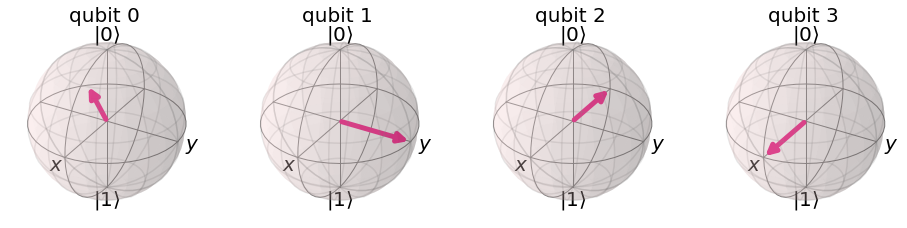

In [15]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Job Status: job has successfully run
{'01000': 1000}


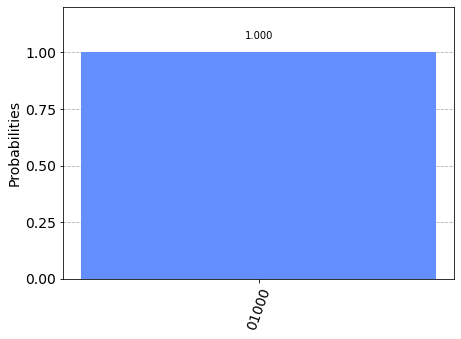

In [15]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qc, simulator, shots=1000)
job_monitor(job)  #display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

#### The result indicates that our output is the same as the input, which makes sense.
#### Then, considering when we have 1 extra qubit at IQFT.

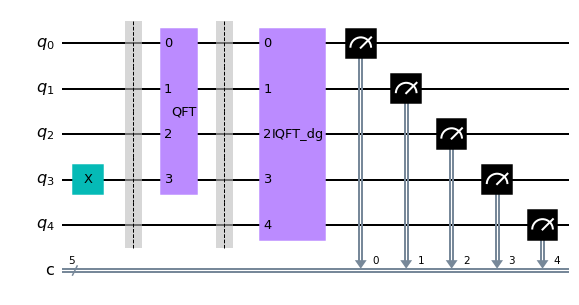

In [5]:
n_qubit = 5
c_qubit = n_qubit
QR = QuantumRegister(n_qubit,name="q")
CR = ClassicalRegister(c_qubit,name="c")
qc = QuantumCircuit(QR,CR)

qc.x(3)

# QFT
qc.barrier() 
qc.compose(QFT(n_qubit-1),range(0,n_qubit-1), inplace=True)  # Let QFT consider only q0 - q3
qc.barrier() 

qc.compose(QFT(n_qubit, inverse=True),range(0,n_qubit), inplace=True)

qc.measure(QR,CR)

qc.draw()

Job Status: job has successfully run
{'11011': 1, '11101': 3, '00001': 1, '10101': 10, '01001': 7, '11111': 2, '00111': 6, '00011': 1, '00101': 2, '01011': 10, '01101': 30, '10111': 6, '10000': 498, '10001': 193, '10011': 28, '01111': 202}


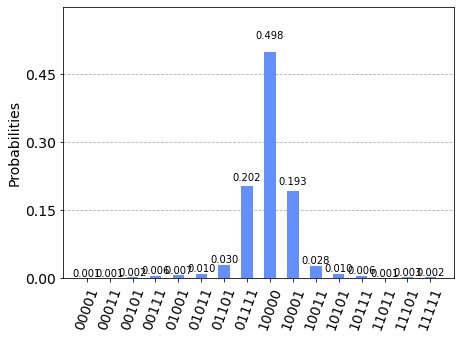

In [6]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qc, simulator, shots=1000)
job_monitor(job)  # display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

##### Remark: I use the built-in function for both QFT and IQFT.
##### In that function, they start applying H gate from q3. That's why my eigenstates will run as q3q2q1q0q4.

#### The histogram shows that the peak is at 10000 state with lower probability amplitudes from the near eigenstates. 

#### Such small probability amplitude comes from an extra added qubit because an extra qubit would add more points in between the original ones.

#### 2 extra qubits

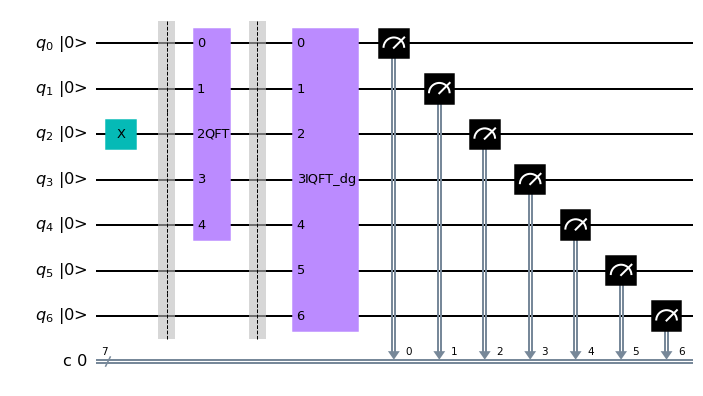

In [10]:
n_qubit = 7
c_qubit = n_qubit
QR = QuantumRegister(n_qubit,name="q")
CR = ClassicalRegister(c_qubit,name="c")
qc = QuantumCircuit(QR,CR)

qc.x(2)

# QFT
qc.barrier() 
qc.compose(QFT(n_qubit-2),range(0,n_qubit-2), inplace=True)
qc.barrier() 

qc.compose(QFT(n_qubit, inverse=True),range(0,n_qubit), inplace=True)

qc.measure(QR,CR)

qc.draw(initial_state=True)

In [13]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n_qubit
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-07-01 03:36:58,226: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_nairobi


Job Status: job has successfully run
{'0000000': 17, '0000001': 8, '0010000': 14, '0010001': 11, '0010010': 12, '0010011': 7, '0010100': 17, '0010101': 12, '0010110': 7, '0010111': 11, '0011000': 10, '0011001': 6, '0011010': 11, '0011011': 2, '0011100': 5, '0011101': 3, '0011110': 4, '0011111': 4, '0000010': 21, '0100000': 10, '0100001': 10, '0100010': 7, '0100011': 3, '0100100': 7, '0100101': 6, '0100110': 9, '0100111': 8, '0101000': 23, '0101001': 6, '0101010': 9, '0101011': 8, '0101100': 5, '0101101': 14, '0101110': 5, '0101111': 5, '0000011': 6, '0110000': 11, '0110001': 11, '0110010': 8, '0110011': 6, '0110100': 6, '0110101': 5, '0110110': 6, '0110111': 5, '0111000': 18, '0111001': 14, '0111010': 11, '0111011': 8, '0111100': 10, '0111101': 4, '0111110': 2, '0111111': 6, '0000100': 9, '1000000': 12, '1000001': 11, '1000010': 13, '1000011': 5, '1000100': 10, '1000101': 6, '1000110': 9, '1000111': 10, '1001000': 13, '1001001': 5, '1001010': 7, '1001011': 9, '1001100': 6, '1001101': 4

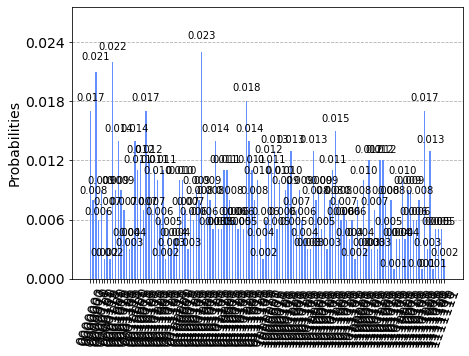

In [18]:
shots = 1000
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

#### Two extra qubits make more number of data points in between the original points.
#### Therefore we can see the more number of interpolated peaks than that of one-extra qubit case.

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table